/Users/javie/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 7482 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Epoch 1/20
234/234 [==============================] - 68s 288ms/step - loss: 0.6748 - accuracy: 0.5809 - val_loss: 0.6125 - val_accuracy: 0.6825
Epoch 2/20
234/234 [==============================] - 67s 286ms/step - loss: 0.6286 - accuracy: 0.6446 - val_loss: 0.5611 - val_accuracy: 0.7091
Epoch 3/20
234/234 [==============================] - 67s 285ms/step - loss: 0.5615 - accuracy: 0.7109 - val_loss: 0.4252 - val_accuracy: 0.8056
Epoch 4/20
234/234 [==============================] - 67s 286ms/step - loss: 0.4344 - accuracy: 0.8102 - val_loss: 0.2580 - val_accuracy: 0.9441
Epoch 5/20
234/234 [==============================] - 68s 291ms/step - loss: 0.2986 - accuracy: 0.8896 - val_loss: 0.2169 - val_accuracy: 0.9105
Epoch 6/20
234/234 [==============================] - 126s 540ms/step - loss: 0.2239 - accuracy: 0.9197 - val_loss: 0.0814 - val_accuracy: 0.9776
Epoch 7/20
234/234 [==========================

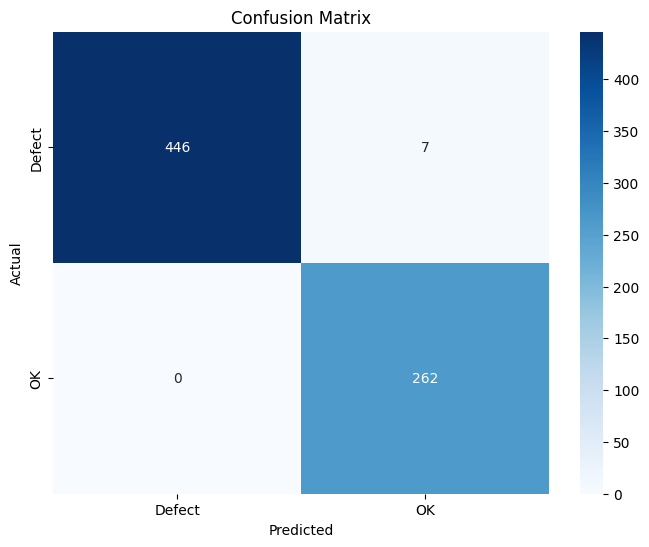

              precision    recall  f1-score   support

      Defect       1.00      0.98      0.99       453
          OK       0.97      1.00      0.99       262

    accuracy                           0.99       715
   macro avg       0.99      0.99      0.99       715
weighted avg       0.99      0.99      0.99       715



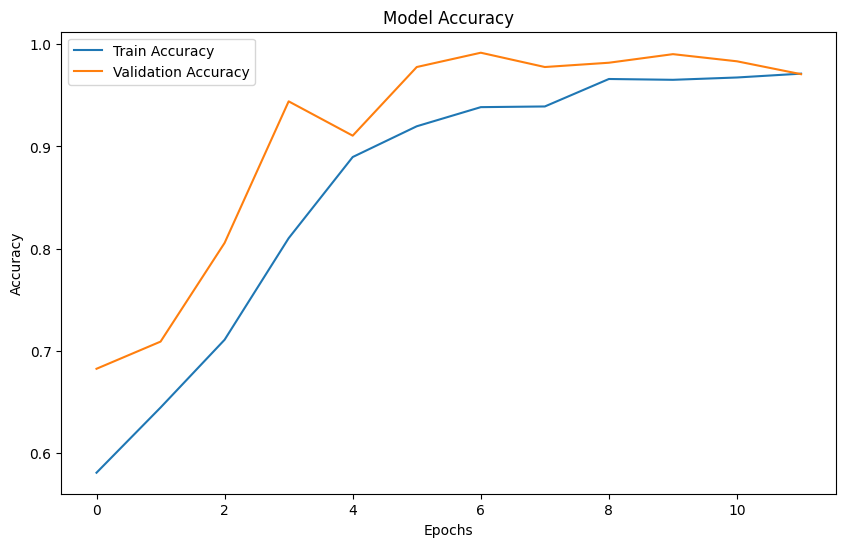

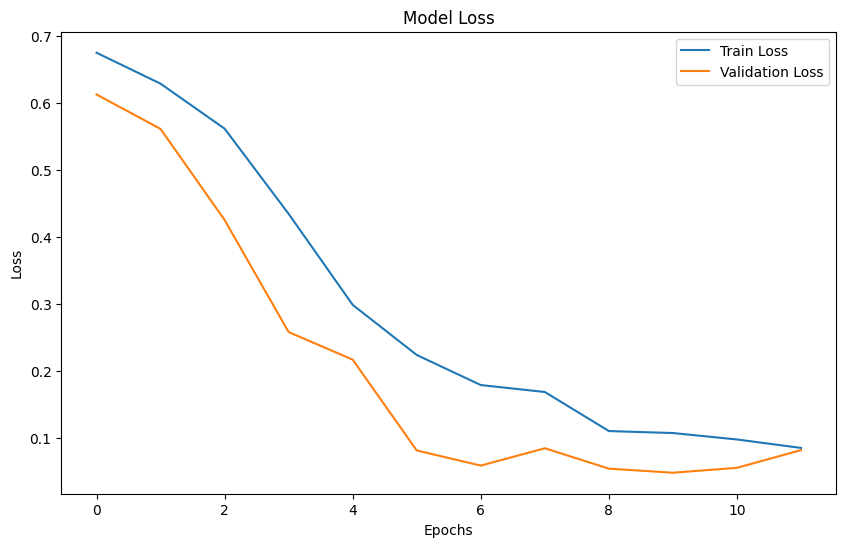

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Define the model with the provided hyperparameters
model = Sequential()

# First Conv2D Layer with 16 filters
model.add(Conv2D(filters=16, kernel_size=(7,7), strides=2, input_shape=(300, 300, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Second Conv2D Layer with 128 filters
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Third Conv2D Layer with 256 filters
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Flattening the layer
model.add(Flatten())

# Dense layer with 512 units
model.add(Dense(units=512, activation='relu'))

# Dropout layer with rate 0.3
model.add(Dropout(rate=0.3))

# Output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with the given learning rate
model.compile(optimizer=Adam(learning_rate=9.878314341240697e-05), loss='binary_crossentropy', metrics=['accuracy'])

# Data Preparation: ImageDataGenerator for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    "Pictures/train",
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    "Pictures/test",
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[early_stop]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions on the test set
preds = model.predict(test_generator)
preds = (preds > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Defect', 'OK'], yticklabels=['Defect', 'OK'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(test_generator.classes, preds, target_names=['Defect', 'OK']))

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
# Save the model
model.save('best_image_classification_model.h5')

/Users/javie/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Let's see which are the 7 Defective parts that were identified as OK by my model:

23/23 [==============================] - 2s 66ms/step
Shape of y_true: (715,)
Shape of y_pred_classes: (715,)
Number of misclassified images: 7
Misclassified images (Predicted OK but Actually Defective):
1: def_front/cast_def_0_150.jpeg


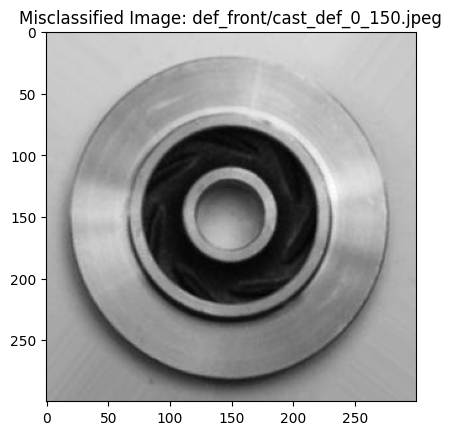

2: def_front/cast_def_0_1506.jpeg


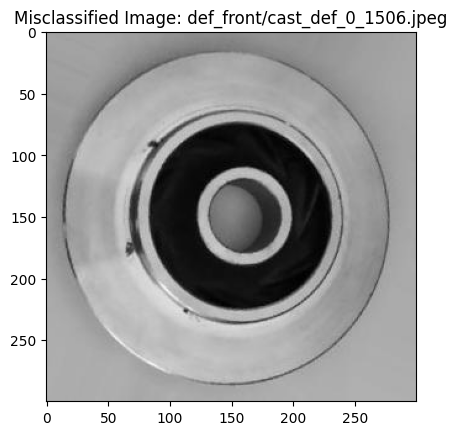

3: def_front/cast_def_0_1591.jpeg


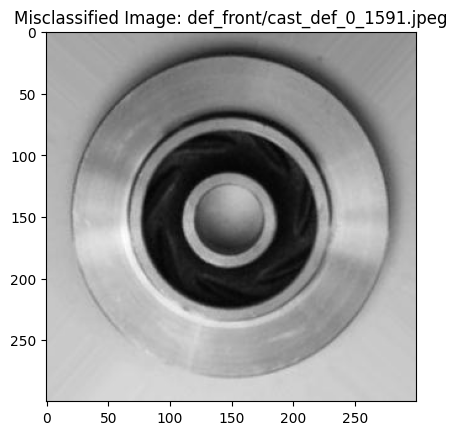

4: def_front/cast_def_0_1633.jpeg


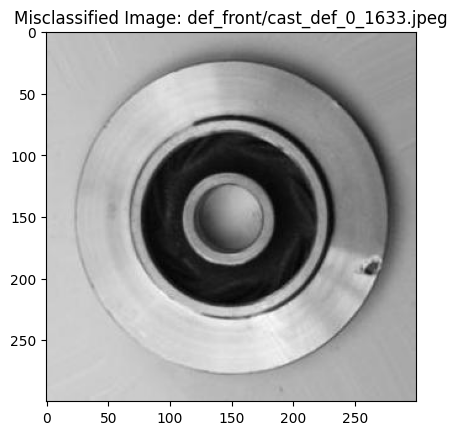

5: def_front/cast_def_0_1685.jpeg


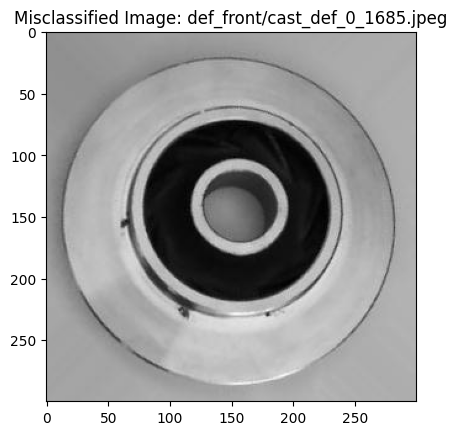

6: def_front/cast_def_0_2154.jpeg


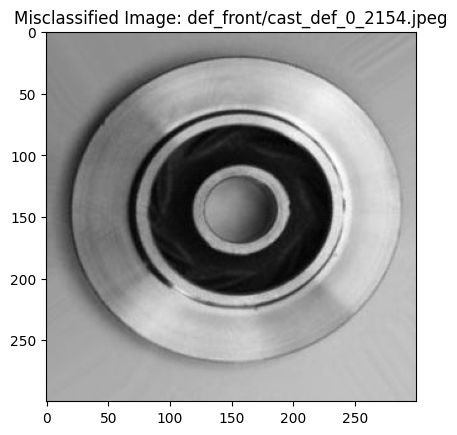

7: def_front/new__0_5223.jpeg


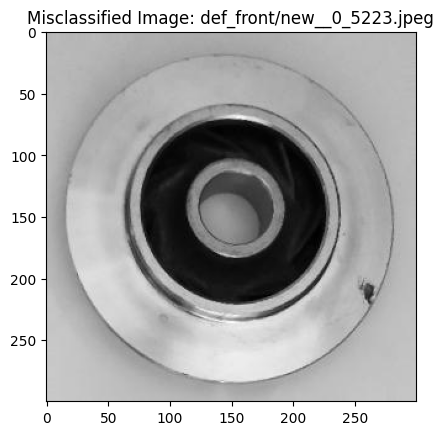

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

test_dir = "Pictures/test"

#Get true labels and predicted labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Flatten to 1D array to match y_true

#Check the shape of y_true and y_pred_classes
print(f"Shape of y_true: {y_true.shape}")
print(f"Shape of y_pred_classes: {y_pred_classes.shape}")

#Find misclassified images (Predicted OK but Actually Defective)
misclassified_indices = np.where((y_true == 0) & (y_pred_classes == 1))[0]

#Retrieve filenames from the generator
filenames = test_generator.filenames
misclassified_filenames = [filenames[i] for i in misclassified_indices]

#Display or save the misclassified images
print(f"Number of misclassified images: {len(misclassified_filenames)}")
print("Misclassified images (Predicted OK but Actually Defective):")
for i, filename in enumerate(misclassified_filenames):
    print(f"{i + 1}: {filename}")
    img_path = os.path.join(test_dir, filename)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"Misclassified Image: {filename}")
    plt.show()